In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#Hack to fix missing PROJ4 env var
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [4]:
# Read sqlite query results into a pandas DataFrame
with sqlite3.connect("/tmp/switrs.sqlite") as con:

    query = (
        "SELECT latitude, longitude "
        "FROM collisions "
        "WHERE latitude IS NOT NULL AND longitude IS NOT NULL"
    )

    # Construct a Dataframe from the results
    df = pd.read_sql_query(query, con)

In [5]:
df.head()

,latitude,longitude
0,39.61953,-121.69178
1,37.82839,-120.63505
2,38.28533,-121.45608
3,38.52921,-121.33477
4,38.56349,-121.49161


<ipython-input-6-a3a993eaf5b7>:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  basemap = Basemap(
<ipython-input-6-a3a993eaf5b7>:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


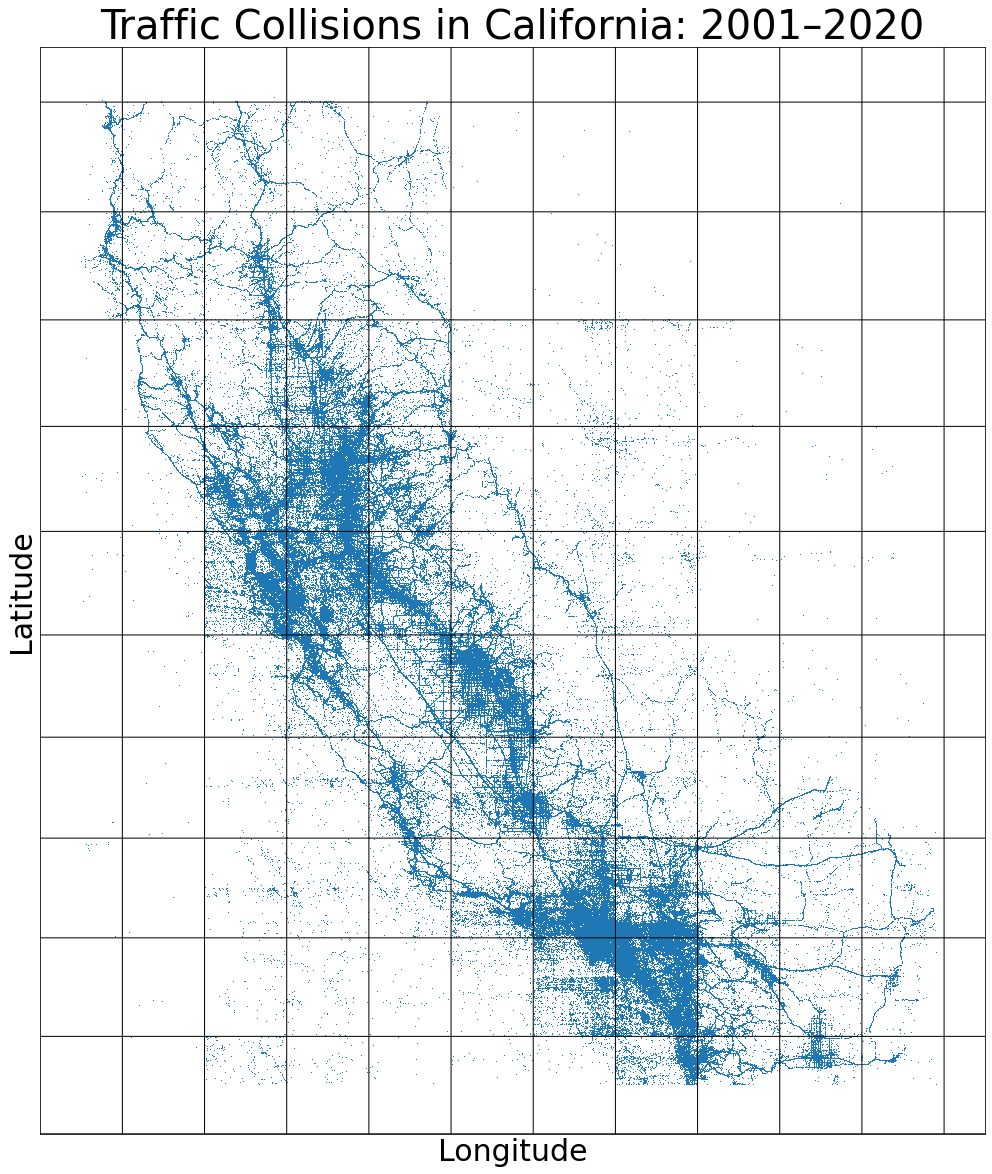

In [6]:
fig = plt.figure(figsize=(20,20))
ax = plt.gca()

basemap = Basemap(
    projection='merc',
    llcrnrlon = -125,   # lower-left corner longitude
    llcrnrlat = 32,     # lower-left corner latitude
    urcrnrlon = -113.5,   # upper-right corner longitude
    urcrnrlat = 42.5,     # upper-right corner latitude
)

basemap.plot(
    df['longitude'].values, 
    df['latitude'].values,
    ',',
    latlon=True,
)

ax.set_title("Traffic Collisions in California: 2001–2020", fontsize=40)
ax.set_xlabel("Longitude", fontsize=30)
ax.set_ylabel("Latitude", fontsize=30)

# Draw lat lon
ZORDER=2
LINEWIDTH=1
DASHES=[1, 0]  # No Dashes [1 pixel on, 0 pixels off]
basemap.drawparallels(range(30, 43, 1), zorder=ZORDER, linewidth=LINEWIDTH, dashes=DASHES)
basemap.drawmeridians(range(236, 247, 1), zorder=ZORDER, linewidth=LINEWIDTH, dashes=DASHES)

for ext in ('png',):
    fig.savefig(
        f"/tmp/2001-2020_california_traffic_collisions_map.{ext}",
        bbox_inches="tight",
    )

fig.show()